In [2]:
import qiskit as q
import numpy as np
import matplotlib.pyplot as plt

write a2
write b8


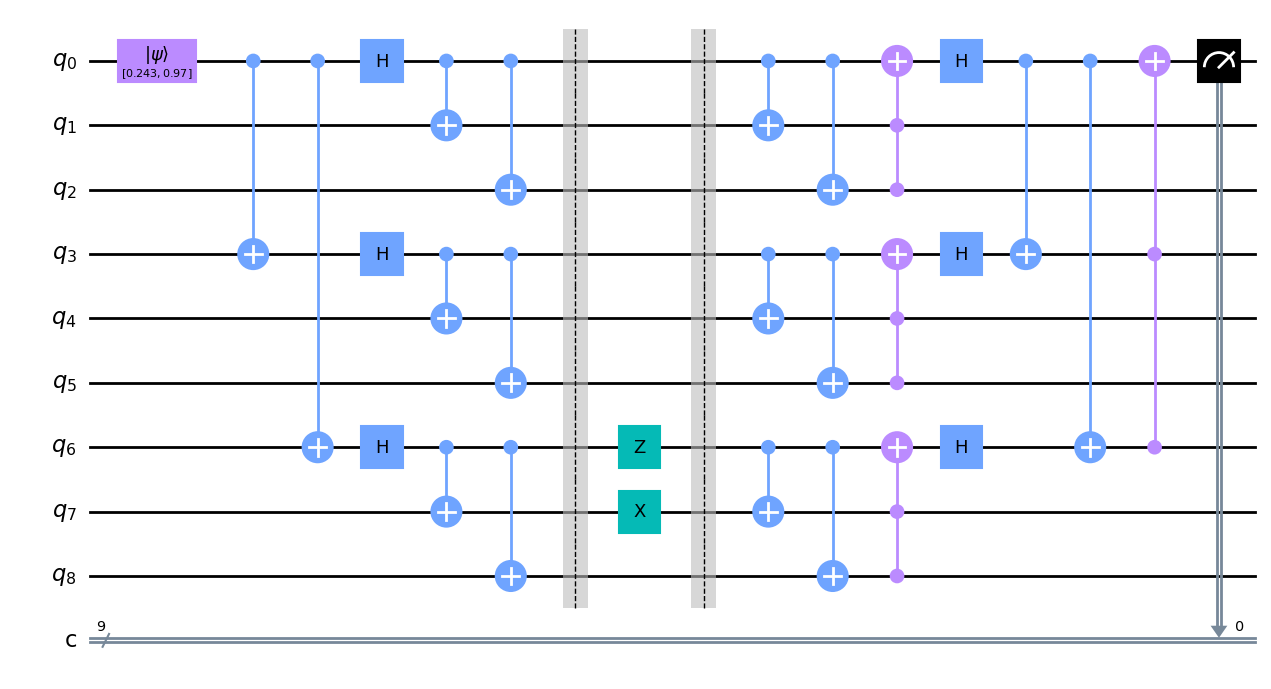

In [5]:
# Assigning coefficient of basis states

a=float(input("write a"))
b=float(input("write b"))

a_norm = float(a/np.sqrt(a**2+b**2))
b_norm = float(b/np.sqrt(a**2+b**2) )              


encode = q.QuantumCircuit(9,9)

# initializing state which we want to send as information
encode.initialize([a_norm , b_norm] ,0)


#Qubits converting into logical qubits
# Encoding (phase flip)
encode.cx(0,3)
encode.cx(0,6)
encode.h(0)
encode.h(3)
encode.h(6)

# Bit flip
encode.cx(0,1)
encode.cx(0,2)
encode.cx(3,4)
encode.cx(3,5)
encode.cx(6,7)
encode.cx(6,8)

encode.barrier()
# state passing through random noise
encode.x(7)
encode.z(6)
#encode.y(3)
#encode.z(6)
encode.barrier()

# Decoding with error correction
encode.cx(0,1)
encode.cx(3,4)
encode.cx(6,7)
encode.cx(0,2)
encode.cx(3,5)
encode.cx(6,8)
encode.ccx(1,2,0)
encode.ccx(5,4,3)
encode.ccx(8,7,6)
encode.h(0)
encode.h(3)
encode.h(6)
encode.cx(0,3)
encode.cx(0,6)
encode.ccx(3,6,0)


encode.measure(0,0)


encode.draw(output="mpl")



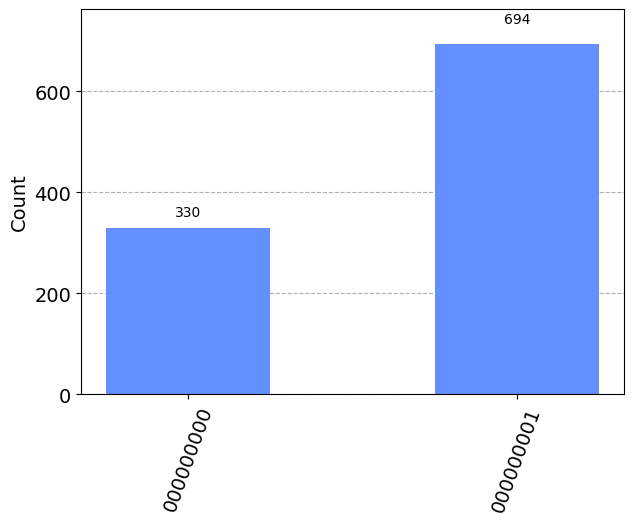

In [4]:
# probablity of basis states which is recieved 

backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(encode,backend,shots=1024)
result = job.result()
counts = result.get_counts(encode)
graph=q.visualization.plot_histogram(counts)
display(graph)

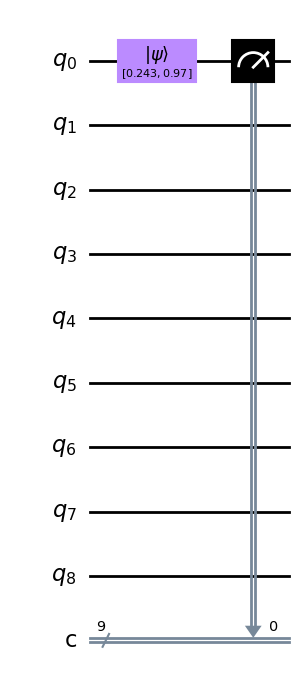

In [6]:
# Replicating circuit to see initial state 

#a=float(input("write a"))
#b=float(input("write b"))

a_norm = float(a/np.sqrt(a**2+b**2))
b_norm = float(b/np.sqrt(a**2+b**2) )              


encode = q.QuantumCircuit(9,9)

# initializing state which we want to send as information
encode.initialize([a_norm , b_norm] ,0)

encode.measure(0,0)
encode.draw(output="mpl")

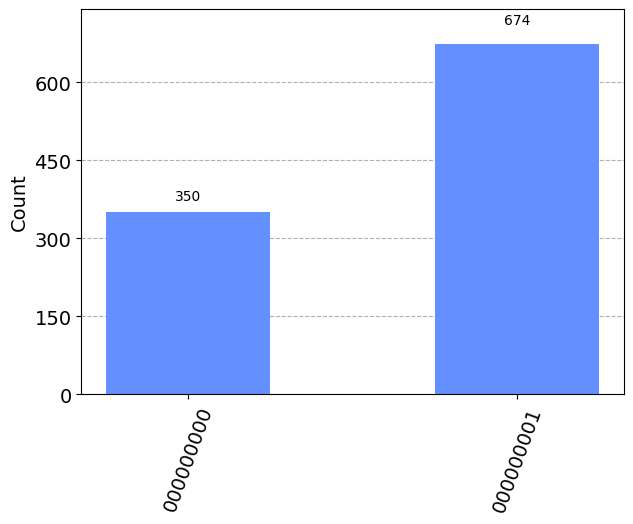

In [40]:
# Initial probablity of occuring basis states (sended state)

backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(encode,backend,shots=1024)
result = job.result()
counts = result.get_counts(encode)
graph=q.visualization.plot_histogram(counts)
display(graph)

In [7]:
# Now by comparing both graphs we can say that sended signal and recieved signal is same , so we succesfully corrected the errors generated by noise.